In [79]:
from src.conf import Config
from src.backtest import run_backtest, multiple_coin_strategy
from src.signals_creation import compute_signal, train_test_split
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import logging
logging.disable()

config = Config()


historical_data = config.historical_data
rsi_params = {"window": 7}
signals = {}
signals["rsi"] = compute_signal("rsi", historical_data, **rsi_params)

historical_data, signals = train_test_split(historical_data, config.TRAIN_TEST_SPLIT, signals)

df_results = multiple_coin_strategy(
    historical_data,
    config.REQUIRED_LIST,
    config.INITIAL_USDT,
    config.STOP_LOSS_PCT,
    config.TAKE_PROFIT_PCT,
    config.TAKER_FEE,
    config.MAKER_FEE,
    signals
).reset_index(names = ["coins"])

{'starting_balance': 99.93, 'final_balance': 85.93, 'performance_algo': -14.01, 'performance_buy_hold': 128.46, 'algo_vs_hold': -110.91, 'nb_negative_trades': 23, 'nb_positive_trades': 4, 'avg_pct_negative_trades': -2.41, 'avg_pct_positive_trades': 11.18, 'total_fee': 1.7, 'worst_drawback': -28.999999999999996, 'detail':           date coin_name position            reason condition     price  \
0   2019-09-21       BTC      BUY        BUY_MARKET       RSI   9983.33   
1   2019-09-23       BTC     SELL    SELL_STOP_LOSS      None   9701.96   
2   2019-11-18       BTC      BUY        BUY_MARKET       RSI   8183.26   
3   2019-11-21       BTC     SELL    SELL_STOP_LOSS      None   7621.90   
4   2020-02-26       BTC      BUY        BUY_MARKET       RSI   8792.22   
5   2020-02-29       BTC     SELL    SELL_STOP_LOSS      None   8531.98   
6   2020-09-03       BTC      BUY        BUY_MARKET       RSI  10141.08   
7   2020-10-10       BTC     SELL  SELL_TAKE_PROFIT      None  11294.79   
8 

## Final balance

<Axes: xlabel='coins', ylabel='final_balance'>

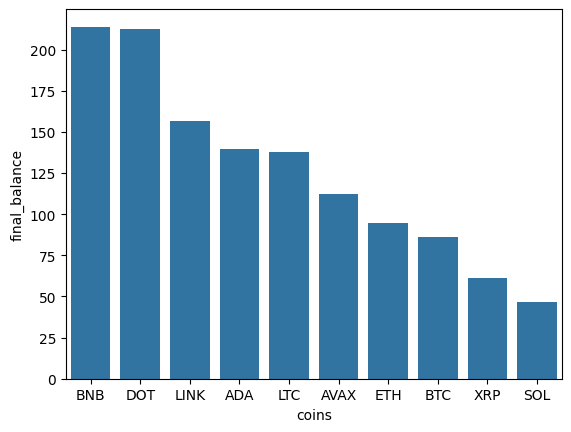

In [80]:
sns.barplot(df_results.sort_values(["final_balance"], ascending = False), x='coins', y="final_balance")

## Performance algo

<Axes: xlabel='coins', ylabel='performance_algo'>

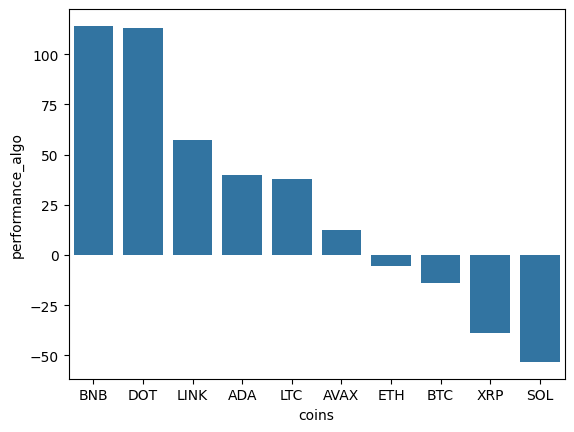

In [81]:
sns.barplot(df_results.sort_values(["performance_algo"], ascending = False), x='coins', y="performance_algo")

## Average trades results

<Axes: xlabel='coins', ylabel='avg_pct_positive_trades'>

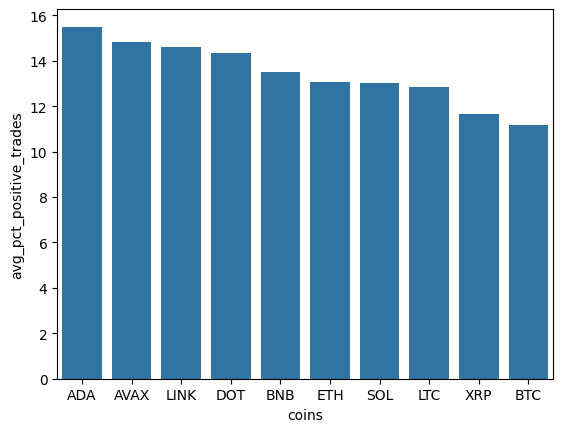

In [82]:
sns.barplot(df_results.sort_values(["avg_pct_positive_trades"], ascending = False), x='coins', y="avg_pct_positive_trades")

<Axes: xlabel='coins', ylabel='avg_pct_negative_trades'>

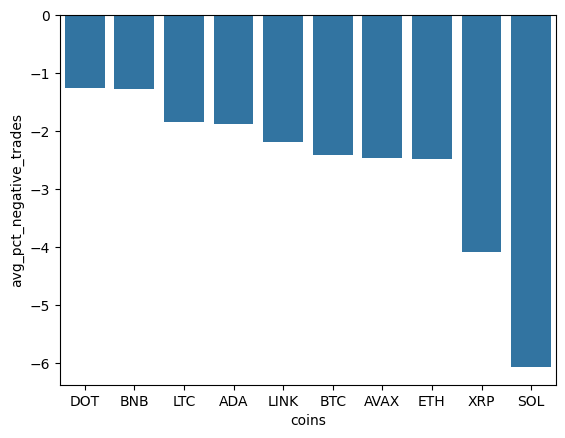

In [83]:
sns.barplot(df_results.sort_values(["avg_pct_negative_trades"], ascending = False), x='coins', y="avg_pct_negative_trades")

## Win rate

<Axes: xlabel='coins', ylabel='win_rate'>

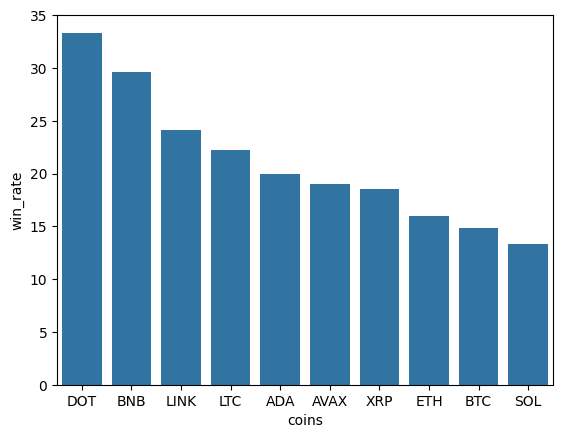

In [84]:
sns.barplot(df_results.sort_values(["win_rate"], ascending = False), x='coins', y="win_rate")

## Total trades

<Axes: xlabel='coins'>

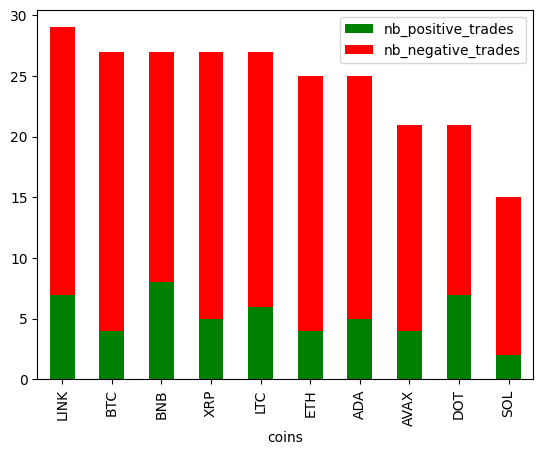

In [85]:
df_temp = df_results.sort_values(["total_trades"], ascending = False)
df_temp[["coins","nb_positive_trades", "nb_negative_trades"]].plot(kind="bar", stacked = True, x= "coins", color = ["green", "red"])

In [86]:
df_results["detail"].iloc[0]
all_details_df = [df_results["detail"].iloc[i] for i in range(len(df_results))]
global_details = pd.concat(all_details_df)

## Wallet details

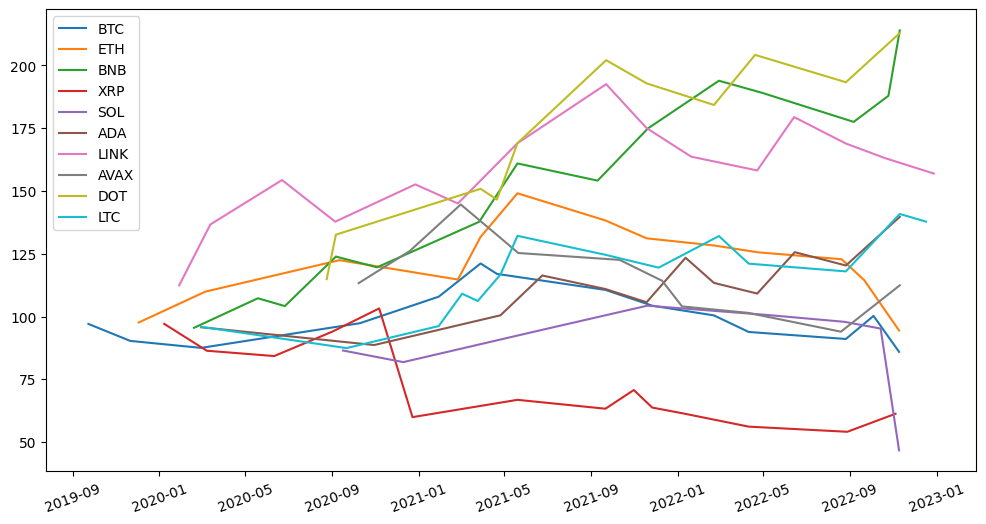

In [90]:
for coin in global_details["coin_name"].unique():
    temp_data = global_details[(global_details["coin_name"] == coin) & (global_details["position"] == "SELL")]
    plt.plot(temp_data["date"],
             temp_data["wallet"], label = coin)
plt.legend(loc="upper left")
plt.xticks(rotation = 20)
fig=plt.gcf()
fig.set_size_inches(12, 6)

## Global wallet

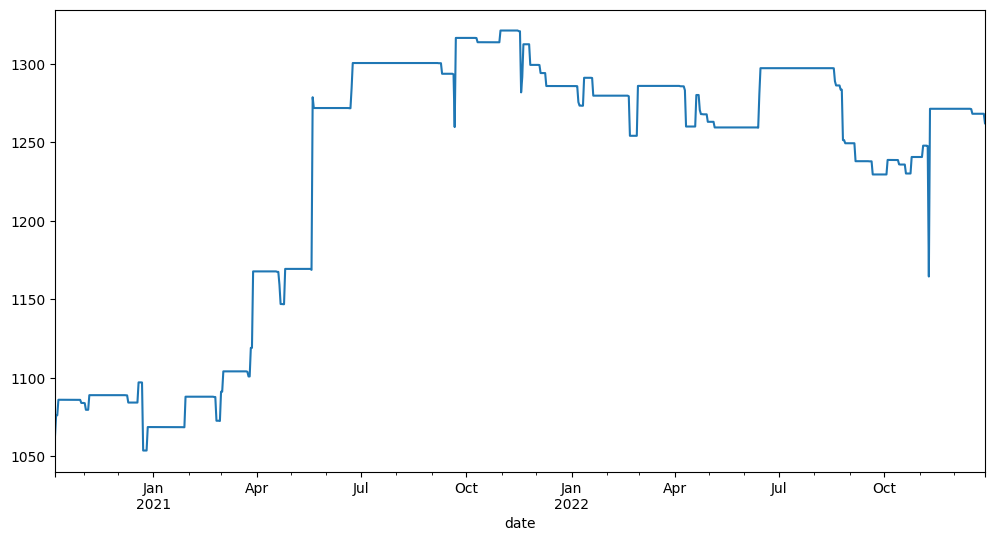

In [89]:
all_wallets = []
for coin_name in global_details["coin_name"].unique():
    temp_data = global_details[global_details["coin_name"] == coin_name]
    temp_data.index = pd.to_datetime(temp_data.date)
    temp_data = temp_data.resample("D").ffill()[["wallet"]]
    temp_data = temp_data.rename(columns = {"wallet" : "wallet_"+coin_name})
    all_wallets.append(temp_data)

df_wallets = pd.concat(all_wallets, axis = 1).ffill()
df_wallets = df_wallets.dropna()
wallet_ts = df_wallets.sum(axis = 1)
wallet_ts.plot()
fig=plt.gcf()
fig.set_size_inches(12, 6)
